In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках.

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn


# Метод наименьших квадратов
def least_squares(x, y):
    # Добавляем столбец единиц к матрице x
    x = np.column_stack((np.ones(len(x)), x))
    # Вычисляем параметры модели
    params = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

    return params

params_least_squares = least_squares(X_train, y_train)
print(params_least_squares)

[-8.85291541 10.00826207]


In [ ]:
# Получение результатов из sklearn

model_sklearn = LinearRegression()

model_sklearn.fit(X_train, y_train) # обучение модели

w_sklearn = model_sklearn.coef_
b_sklearn = model_sklearn.intercept_
print(w_sklearn, b_sklearn)

[10.00826207] -8.852915405405572


In [ ]:
# Найдём значения метрик MSE и MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# У реализации из sklearn

y_sklearn_train_predicted = model_sklearn.predict(X_train)
y_sklearn_test_predicted = model_sklearn.predict(X_test)

MSE_train_sklearn = mean_squared_error(y_train, y_sklearn_train_predicted)
MSE_test_sklearn = mean_squared_error(y_test, y_sklearn_test_predicted)
MAE_train_sklearn = mean_absolute_error(y_train, y_sklearn_train_predicted)
MAE_test_sklearn = mean_absolute_error(y_test, y_sklearn_test_predicted)

print("sklearn.linear_modelLinearRegression: ")
print('Train MSE: ', MSE_train_sklearn)
print('Test MSE: ', MSE_test_sklearn)
print('Train MAE: ', MAE_train_sklearn)
print('Test MAE: ', MAE_test_sklearn)

sklearn.linear_modelLinearRegression: 
Train MSE:  112.78222358198629
Test MSE:  127.4942844506764
Train MAE:  8.739330877807904
Test MAE:  9.51063911981747


In [ ]:
# У нашего МНК

def model_least_squares_predict(params, x):
  return params[1] * x + params[0]
y_least_squares_train_predicted = model_least_squares_predict(params_least_squares, X_train)
y_least_squares_test_predicted = model_least_squares_predict(params_least_squares, X_test)

MSE_train_least_squares = mean_squared_error(y_train, y_least_squares_train_predicted)
MSE_test_least_squares = mean_squared_error(y_test, y_least_squares_test_predicted)
MAE_train_least_squares = mean_absolute_error(y_train, y_least_squares_train_predicted)
MAE_test_least_squares = mean_absolute_error(y_test, y_least_squares_test_predicted)

print("Метод наименьших квадратов: ")
print('Train MSE: ', MSE_train_least_squares)
print('Test MSE: ', MSE_test_least_squares)
print('Train MAE: ', MAE_train_least_squares)
print('Test MAE: ', MAE_test_least_squares)

Метод наименьших квадратов: 
Train MSE:  112.78222358198629
Test MSE:  127.4942844506764
Train MAE:  8.739330877807904
Test MAE:  9.510639119817471


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

params_least_squares_sin = least_squares(data['x_train'], data['y_train'])
print(params_least_squares_sin)


y_least_squares_train_predicted_sin = model_least_squares_predict(params_least_squares_sin, data['x_train'])
#y_least_squares_test_predicted_sin = model_least_squares_predict(params_least_squares_sin, X_test)

MSE_train_least_squares_sin = mean_squared_error(data['y_train'], y_least_squares_train_predicted_sin)
#MSE_test_least_squares_sin = mean_squared_error(y_test, y_least_squares_test_predicted)
MAE_train_least_squares_sin = mean_absolute_error(data['y_train'], y_least_squares_train_predicted_sin)
#MAE_test_least_squares_sin = mean_absolute_error(y_test, y_least_squares_test_predicted)

print("Метод наименьших квадратов и синусоида: ")
print('Train MSE: ', MSE_train_least_squares_sin)
#print('Test MSE: ', MSE_test_least_squares)
print('Train MAE: ', MAE_train_least_squares_sin)
#print('Test MAE: ', MAE_test_least_squares)

[ 2.00860413 -0.3273352 ]
Метод наименьших квадратов и синусоида: 
Train MSE:  0.27032881183704455
Train MAE:  0.4333167359613247


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \widehat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

## Задание 3.3

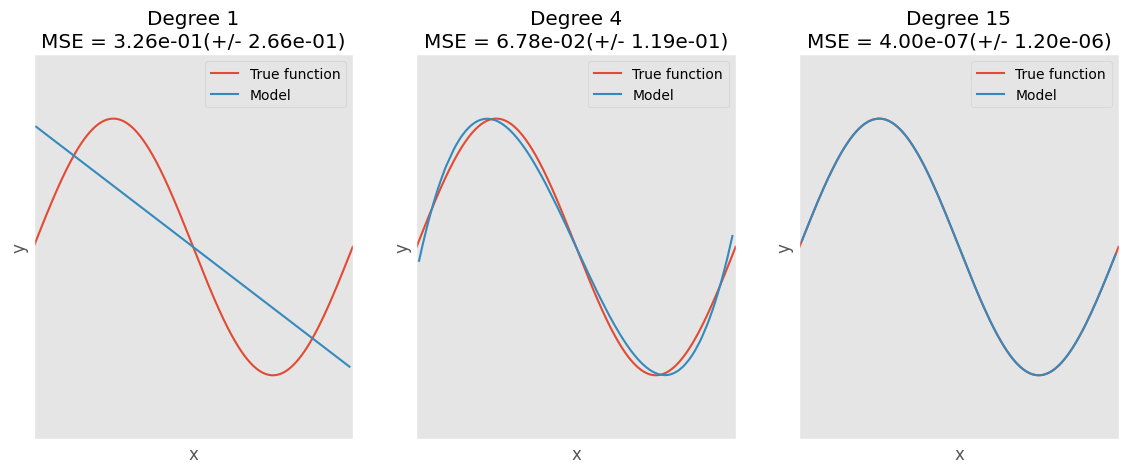

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

plt.figure(figsize=(14, 5))

degrees = [1, 4, 15]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(data['support'].reshape(-1, 1), data['values'])

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, data['support'].reshape(-1, 1), data['values'],
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 2*np.pi, num=1000)
    plt.plot(data['support'], data['values'], label="True function")
    plt.plot(data['x_train'], pipeline.predict(data['x_train'].reshape(-1, 1)), label="Model")


    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 2*np.pi)
    plt.ylim((-0.5, 2.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

Возьмите датасет отсюда: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#from sklearn.datasets import load_boston

#house_data = load_boston()
house_data = pd.read_csv("drive/MyDrive/Colab Notebooks/housing.csv", sep='\s+', names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Задание 3.4

In [ ]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

X = pd.DataFrame(house_data.drop('target', axis=1))
y = house_data['target']

In [ ]:
# Настроим параметры линейной регрессии для полного датасета


## Разбиение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Выполним нормировку данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
X_test = pd.DataFrame(X_test, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

## Обучение модели линейной регрессии
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

## Метрики MSE и MAE
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

Train MSE:  22.20632334552181
Test MSE:  21.929647135675236
Train MAE:  3.366586284431335
Test MAE:  3.180510413169298


<BarContainer object of 13 artists>

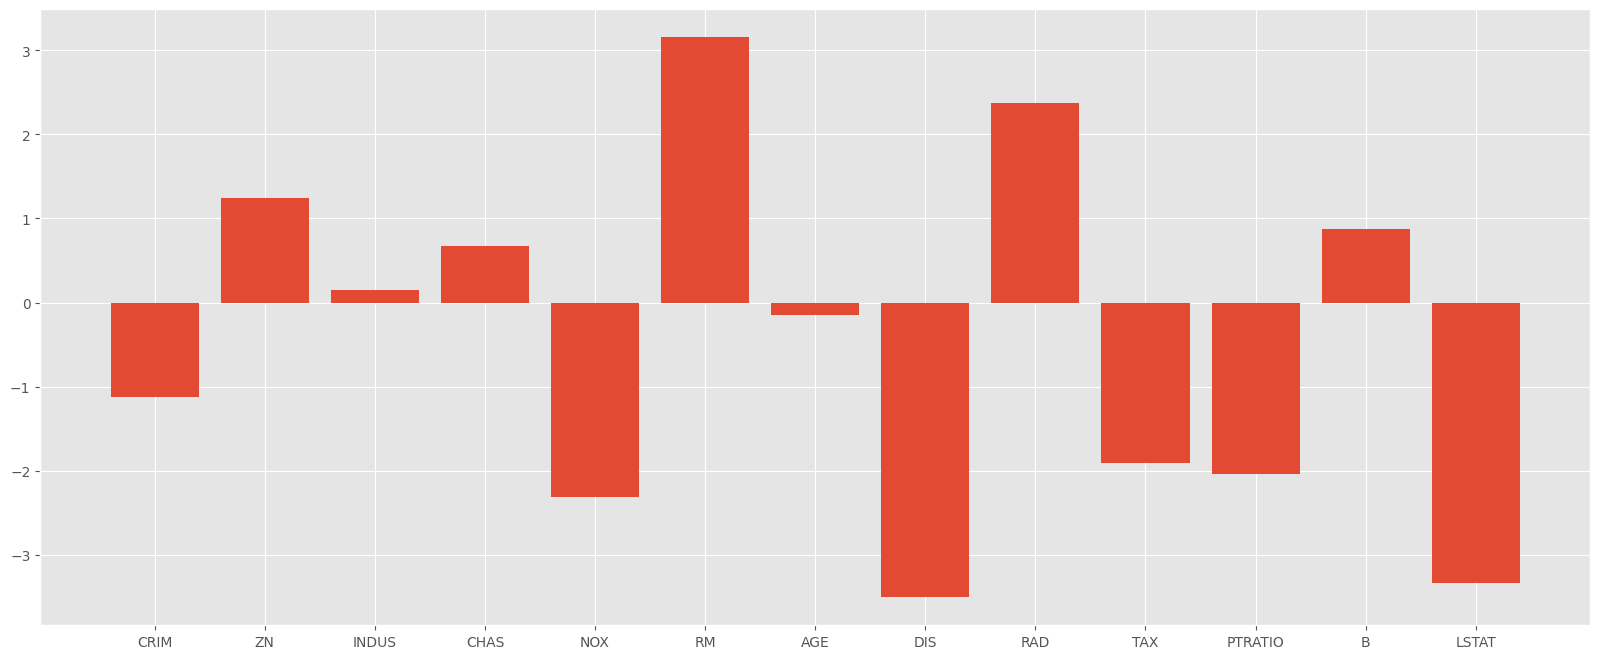

In [ ]:
## Визуализация получившихся весов

plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

In [ ]:
coef_importance = pd.Series(model.coef_, index=X.columns)
coef_importance = coef_importance.sort_values(ascending=False, key=abs)
print(coef_importance)

DIS       -3.507335
LSTAT     -3.339201
RM         3.155726
RAD        2.378306
NOX       -2.313767
PTRATIO   -2.042734
TAX       -1.904921
ZN         1.239927
CRIM      -1.122458
B          0.878115
CHAS       0.671233
AGE       -0.154144
INDUS      0.147228
dtype: float64


In [ ]:
## Выделим 7 наиболее значимых признаков
print("7 наиболее значимых признаков")
print(coef_importance.index[:7])

X_test_trunc = X_test.loc[:, X_test.columns.isin(coef_importance.index[:7])]
X_train_trunc = X_train.loc[:, X_train.columns.isin(coef_importance.index[:7])]

## Натренируем модель по этим признакам
## Обучение модели линейной регрессии
model_trunc = LinearRegression()

model_trunc.fit(X_train_trunc, y_train)

y_train_prediction_trunc = model_trunc.predict(X_train_trunc)
y_test_prediction_trunc = model_trunc.predict(X_test_trunc)

## Метрики MSE и MAE
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction_trunc))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction_trunc))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction_trunc))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction_trunc))

7 наиболее значимых признаков
Index(['DIS', 'LSTAT', 'RM', 'RAD', 'NOX', 'PTRATIO', 'TAX'], dtype='object')
Train MSE:  24.853884519878974
Test MSE:  22.798104051977162
Train MAE:  3.6607712004226953
Test MAE:  3.135132984332497
